# Importations

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

This dataset contains logs of the horde faction of a world of warcraft server. Data has been collected everyday between January 2006 (World of Warcraft Classic era) and January 2009 (Wrath of the Lich King era, the second expansion). We can use this data to analyze the character repartition, the addiction to the game with the players' assiduity, and some other minor details such as logout zones. <br/>

This notebook is a work in progress, some more content will be added in the future, as well as more in depth analysis.

In [47]:
data = pd.read_parquet('data.parquet',engine='pyarrow')
print(data.shape)

rows_with_numbers = data[data['race'].str.contains(r'\d', regex=True)]
print(rows_with_numbers.shape)
data = data.drop(rows_with_numbers.index)

data=data[data["race"].isin(["Orc","Troll","Tauren","Undead","Blood Elf"])] # We do not want "Blood Elf" to be erased because of the space
data=data[data["class"].isin(["Hunter","Mage","Warrior","Warlock","Death Knight","Priest","Rogue","Paladin","Shaman","Druid"])]
data['race'] = data['race'].cat.remove_unused_categories()
data['class'] = data['class'].cat.remove_unused_categories()
data.head()

(36513647, 7)
(40620, 7)


,player_id,guild,level,race,class,where,datetime
0,46340,53.0,26,Orc,Hunter,Razorfen Kraul,2007-06-12 03:17:48
1,31887,NaN,10,Orc,Hunter,Durotar,2007-06-12 03:17:48
2,47258,NaN,15,Orc,Warrior,The Barrens,2007-06-12 03:17:48
3,17448,NaN,43,Orc,Hunter,Silverpine Forest,2007-06-12 03:17:48
4,45159,104.0,57,Orc,Warlock,Winterspring,2007-06-12 03:17:53


# Character analysis

In [48]:
data.sort_values(by="race")
uniquePlayerData=data.drop_duplicates(subset="player_id")
#uniquePlayerData = uniquePlayerData[uniquePlayerData["race"].str.isalpha()]
print(uniquePlayerData.shape)

character = uniquePlayerData["race"].astype(str)+" "+uniquePlayerData["class"].astype(str)

uniquePlayerData["character"] = character
uniquePlayerData.head()

(91056, 7)


c:\Users\cheni\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,player_id,guild,level,race,class,where,datetime,character
0,46340,53.0,26,Orc,Hunter,Razorfen Kraul,2007-06-12 03:17:48,Orc Hunter
1,31887,NaN,10,Orc,Hunter,Durotar,2007-06-12 03:17:48,Orc Hunter
2,47258,NaN,15,Orc,Warrior,The Barrens,2007-06-12 03:17:48,Orc Warrior
3,17448,NaN,43,Orc,Hunter,Silverpine Forest,2007-06-12 03:17:48,Orc Hunter
4,45159,104.0,57,Orc,Warlock,Winterspring,2007-06-12 03:17:53,Orc Warlock


## Race repartition

[28547 17781 16387 14283 14058]


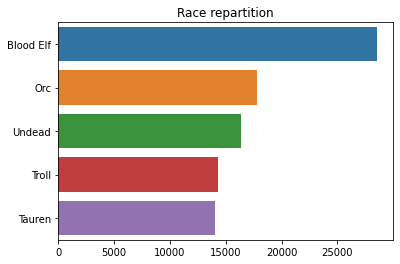

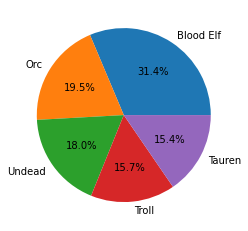

In [49]:
print(uniquePlayerData["race"].value_counts().values)
sns.barplot(uniquePlayerData,y=uniquePlayerData["race"].value_counts().index,x=uniquePlayerData["race"].value_counts().values,order = uniquePlayerData["race"].value_counts().index)
plt.title("Race repartition")
plt.show()

plt.pie(uniquePlayerData["race"].value_counts().values, labels = uniquePlayerData["race"].value_counts().index,autopct='%1.1f%%')
plt.plot("Pie chart of race repartition")
plt.show()

How to analyze this plot? First, we have to highlight a surprising result: Orcs are not the most plaeyd race, even though they are the Horde main race. The first spot has been stolen by Blood Elves with 31.4% of players, almost a 3rd of the player base. 3rd and 4th races are Troll and Tauren, with only 0.3% player of difference.

What could be the reasons for this ranking? For the Blood Elves, the access to the Paladin class (see below) as well as their aesthetic may be a good explanation for them reaching the first place. <br/>

For the same reasons, Undeads (18%) are the third most played race, as their racial traits make the Undeads nice Player versus Player (PvP) characters.


## Class repartition

[21381 11099 10717 10701  9437  7966  7645  6412  3960  1738]


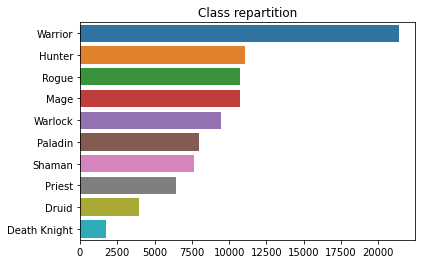

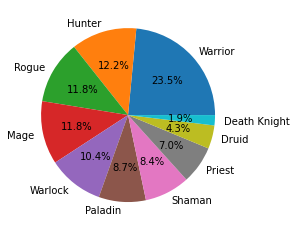

In [59]:
print(uniquePlayerData["class"].value_counts().values)
sns.barplot(uniquePlayerData,y=uniquePlayerData["class"].value_counts().index,x=uniquePlayerData["class"].value_counts().values,order = uniquePlayerData["class"].value_counts().index,)
plt.title("Class repartition")
plt.show()

plt.pie(uniquePlayerData["class"].value_counts().values, labels = uniquePlayerData["class"].value_counts().index,autopct='%1.1f%%')
plt.plot("Pie chart of class repartition")
plt.show()

What do we learn by watching the class repartition? First, the most popular class is Warrior, which was predictable as it is the most basic class choice. It is most likely going to be the same on the Alliance side. Then, the least popular class is the Death Knight, which was also predictable, for two reasons: this is the latest class, added in the latest expansion (Wrath of the Lich King), and to create a Death Knight, the player has to have a character level 55 or above, which requires some playtime on another character. <br />

Now, let us take a look at some more technical results. The top 5 classes are damage dealer classes (known as DPS, for Damage Per Second), as player are more likely to play a damage dealing character instead of a tank or a healer. Even though Warrior have the Protection specialization (Tank) all the others (3 per classes, then 14 specializations) are DPS. This also explains why Priest (2 Healing specializations, 1 DPS) and Paladin (1 Healing specialization, 1 Tanking and 1 DPS) are a bit left behind. <br/>

One last question remains: why are Druid so rarely used? The answer lies in the class/race combination. Indeed, to create a Horde Druid in the game (in Wrath of the Lich King, there are new combinations available in the current version), you have to play a Tauren (and a Night Elf if you are playing for the Alliance). This restriction, coupled with the fact that the specializations are Healer/Tank/DPS, limits the number of players willing to play a Druid. However, this is the same with Paladin and Blood Elves, but the race graph shows that there are much more Blood Elves than Taurens, which makes Paladin a more played class than Druid (without considering that Paladin was one of the best classes back then).

## Class+race repartition

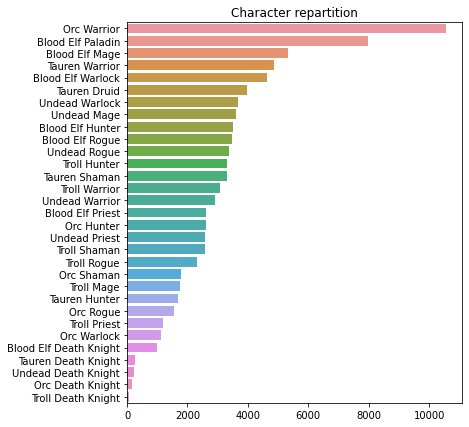

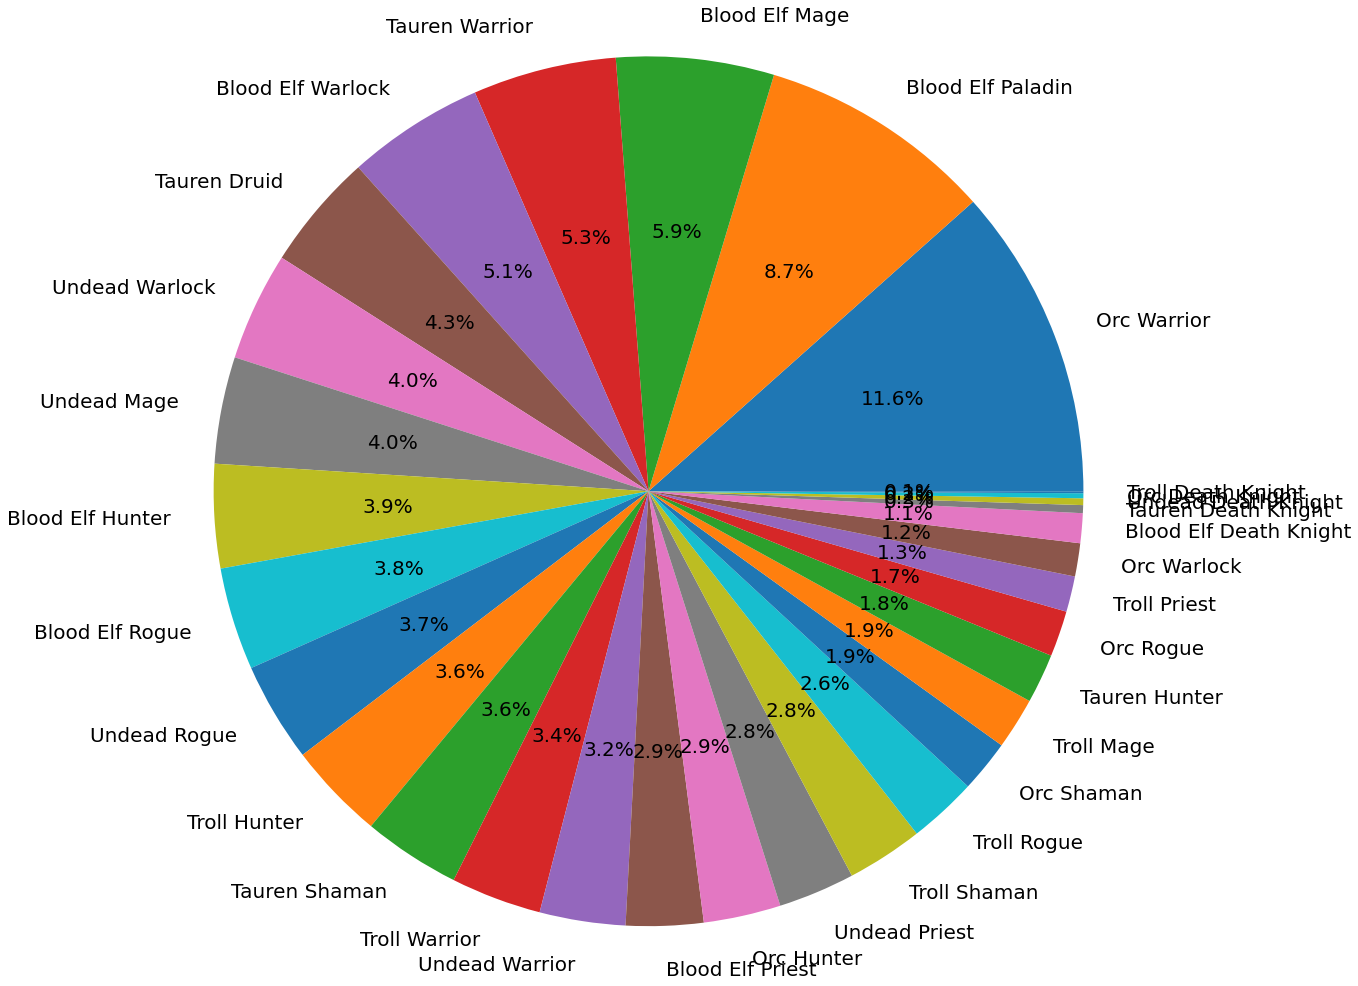

In [60]:
fig, ax = plt.subplots(figsize=(6, 7))
sns.barplot(uniquePlayerData,y=uniquePlayerData["character"].value_counts().index,x=uniquePlayerData["character"].value_counts().values,order = uniquePlayerData["character"].value_counts().index,ax=ax)
plt.title("Character repartition")
plt.show()

plt.pie(uniquePlayerData["character"].value_counts().values, labels = uniquePlayerData["character"].value_counts().index,autopct='%1.1f%%',radius=5,textprops={"fontsize":"20"})
plt.plot("Pie chart of character repartition")
plt.show()

Without surprise, Orc Warrior is the most common choice of character, as it is the most basic combination one can make for the Horde. As expected, Paladins are well represented with the Blood Elves, while Druids are not even the Taurens' first choice. Overall, except for the 5 first combinations, and the Death Knights, the combinations are well distributed. <br/>

Let us take a look at the repartition individually:<br/>
Warrior: 
- Most: Orcs
- Least: Undeads

Mage:
- Most: Blood Elves
- Least: Trolls

Warlock: 
- Most: Blood Elves
- Least: Orcs

Hunter: 
- Most: Blood Elves
- Least: Taurens

Rogue:
- Most: Blood Elves
- Least: Orcs

Shaman:
- Most: Taurens
- Least: Orcs

Priest:
- Most: Blood Elves
- Least: Trolls

Death Knight:
- Most: Blood Elves
- Least: Trolls

What can we conclude from there? When Blood Elves are eligible for a class, they are the most played race for this class. On the other hand, it looks like that, apart from Warriors, Orcs are excluded from the other classes, being the least chosen pick for almost all classes (except for Death Knights where they are second to last).